<a href="https://colab.research.google.com/github/marlanaswann/spr5-kdm1a-conservation-/blob/main/notebooks/03_Sequence_Alignment_of_KDM1A_and_SPR_5_(MAFFT)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install MAFFT + Import Packages

In [36]:
!sudo apt-get install -y mafft
!pip install biopython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from Bio import SeqIO
from Bio.Align import substitution_matrices
from Bio.Align import AlignInfo
from Bio import AlignIO
from google.colab import files

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mafft is already the newest version (7.490-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


## Upload 2 FASTA Files

In [ ]:
from google.colab import files

print("Upload FASTA file #1")
fasta1 = files.upload()

print("Upload FASTA file #2")
fasta2 = files.upload()

# Print names for confirmation
print("Uploaded files:")
print(list(fasta1.keys()))
print(list(fasta2.keys()))


Upload FASTA file #1


Saving KDM1Afin.fasta to KDM1Afin.fasta
Upload FASTA file #2


Saving SPR5fin.fasta to SPR5fin.fasta
Uploaded files:
['KDM1Afin.fasta']
['SPR5fin.fasta']


## Combine files automatically into one FASTA

In [ ]:
combined_fasta = "combined_sequences.fasta"

with open(combined_fasta, "w") as outfile:
    outfile.write(open('SPR5fin.fasta').read().strip() + "\n")
    outfile.write(open('KDM1Afin.fasta').read().strip() + "\n")

print("Combined FASTA created:", combined_fasta)

#Preview new combined FASTA file
with open(combined_fasta, "r") as infile:
    print(infile.read())


Combined FASTA created: combined_sequences.fasta
>sp|Q9XWP6|KDM1A_CAEEL Lysine-specific histone demethylase 1 OS=Caenorhabditis elegans OX=6239 GN=spr-5 PE=1 SV=1
MSSDTGSEYLDEEIRGDELGPSIDDNALAAAASAARLPFDRPTDHELAFFPELWEHKTAV
EVFLLLRNSTLATWQYNPLKECTALDVRNNVFPPFNSDLDLIQNIVHYLSRHGLINFGRY
VRSTKISRFLVRDRRSVIVIGAGAAGISAATQLESFGFDVIVLEARNCIGGRIHSFKSKS
GEIMETGGDTLRKIEDSPMATLLHQVNFEEHGVFDFTSVFVEGRPLNEEKIHLFLDHYKS
AHGALNYQAHQCEHRDDQGSFISRQQAYENLLSMCERGTLIKYYNFCKSLETVARAREHH
FNQMKQLRMTALMAENQLKKMEEEGNLEQDPVLRRSLKRDIATSLEKFEEVADAFETADN
HWQRLNEHPQAKQYMHPGSEFATFNFMLGFEEYLVGAQLEKVQFSCDSMQNKENGVAARL
TEGIAELLTQLSEKRKLDIRLKHRVLDIDYSGFEHVLLKVQRENGDIEEMKAAFVVSTLP
IGVLKKTIIADERAPTFTPSLPDKKVEAIRNIGCGSVNKCILEFDRVFWTANGGRNQFVT
VSPNIKTRGSMNIWSSVPGSKVLCTYIVGEEAMLELPDDVIIQNAMINLQKAFGNNCPRA
PISAHITRWHDDELAFGSGAFMSLRTETTSFDDVMEPLKTSDGMSRVYFAGEHTCSSYTS
TIQGAWMSGARAAADISNDHIGIGFVDISGTRGQRGDEEEELLIEVDIDGKIPEKDENEA
VADIPNAPNAPNAQKPEEIPKIAEEIELVAEAEKAEKAEVQLEPLVPTVE
>sp|O60341|KDM1A_HUMAN Lysine-specific histone demethy

## Run MAFFT Alignment

In [ ]:
aligned_output = "aligned_spr5_kdm1a.fasta"
!mafft --auto combined_sequences.fasta > {aligned_output}

print("Alignment complete:", aligned_output)

with open(aligned_output) as f:
    print(f.read())


outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.490
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
    0 / 2
done.

Progressive alignment ... 
STEP     1 /1 
done.
tbfast (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

    0 / 2
Segment   1/  1    1- 931
done
dvtditr (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 L-INS-i (Probably most accurate, very slow)
 Iterative refinement method (<16) with LOCAL pai

### Confirming the Saved Alignment File

In [37]:
# Print the first few lines of the saved alignment file to confirm
with open(aligned_output, "r") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i >= 10: # Print first 10 lines to avoid excessive output
            print("... (truncated)")
            break

print(f"\nThe complete alignment is saved as: {aligned_output}")

>sp|Q9XWP6|KDM1A_CAEEL Lysine-specific histone demethylase 1 OS=Caenorhabditis elegans OX=6239 GN=spr-5 PE=1 SV=1
M-----------------------------------------------------------
------------------------------------------------------------
-------SSDTGSEYLDEEIRGDEL------------GPSIDDN--------ALAAAASA
ARLPFDRPTDHELAFFPELWEHKTAVE-VFLLLRNSTLATWQYNPLKECTALDVRNNVFP
PFNSDLDLIQNIVHYLSRHGLINFGRYVRSTKISRFLVRDRRSVIVIGAGAAGISAATQL
ESFGFDVIVLEARNCIGGRIHSFKSKSGEIMETGGDTLRKIEDSPMATLLHQVNFEEHGV
FDFTSVF-VEGRPLNEEKIHLFLDHYKSAHGALNYQAHQCEHRDDQGSFISRQQAYENLL
SMCERGTLIKYYNFCKSLETVARAREHHFNQMKQLRMTALMAENQLKKMEEEGNLEQ--D
PVLRRSLKRDIATSLEKFEEVADAFETADNHWQRLNEHPQAKQYMHPGSEFATFNFMLGF
EEYLVGAQLEKVQFSCDSMQNKENGVAARLTEGIAELLTQLSEKRKLDIRLKHRVLDIDY
... (truncated)

The complete alignment is saved as: aligned_spr5_kdm1a.fasta


### Download the Alignment File

In [39]:
# To download the alignment file to your local computer, uncomment and run the following line:
# from google.colab import files
#files.download(aligned_output)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Compute Percent Identity

In [ ]:
# Read aligned sequences
records = list(SeqIO.parse(aligned_output, "fasta"))
seq1 = np.array(list(str(records[0].seq)))
seq2 = np.array(list(str(records[1].seq)))

matches = (seq1 == seq2) & (seq1 != "-") & (seq2 != "-")
percent_identity = matches.sum() / min(len(seq1[seq1 != "-"]), len(seq2[seq2 != "-"])) * 100

print(f"Percent Identity: {percent_identity:.2f}%")


Percent Identity: 25.58%


## Visualize Alignment (shaded identity map)

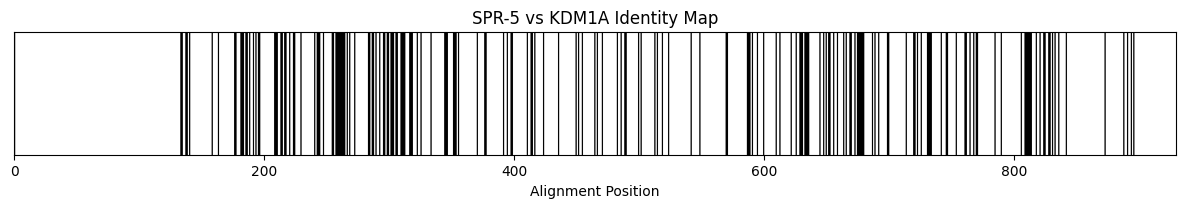

In [ ]:
# Create match array (1 = match, 0 = mismatch)
match_array = np.where(matches, 1, 0)

plt.figure(figsize=(15, 1.6))
plt.imshow([match_array], aspect="auto", cmap="Greys")
plt.yticks([])
plt.xlabel("Alignment Position")
plt.title("SPR-5 vs KDM1A Identity Map")
plt.show()


## Highlight Catalytic Residues on the Alignment

In [ ]:
# Replace these with real catalytic residue positions (1-indexed)
catalytic_positions = [309, 330, 367]

aligned_catalytic = []

pos_counter = 0
for i, aa in enumerate(seq1):
    if aa != "-":
        pos_counter += 1
    if pos_counter in catalytic_positions:
        aligned_catalytic.append(i)

print("Catalytic alignment positions:", aligned_catalytic)


Catalytic alignment positions: [456, 479, 516]


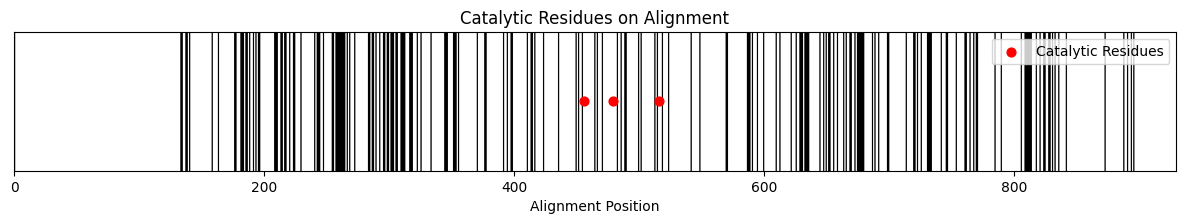

In [ ]:
#Visualize catalytic residues on identity map
plt.figure(figsize=(15, 1.8))
plt.imshow([match_array], aspect="auto", cmap="Greys")
plt.scatter(aligned_catalytic, [0]*len(aligned_catalytic), color="red", s=40, label="Catalytic Residues")
plt.yticks([])
plt.legend(loc="upper right")
plt.title("Catalytic Residues on Alignment")
plt.xlabel("Alignment Position")
plt.show()


# Task
Create a heatmap visualizing the occurrence of each domain in SPR-5 versus KDM1A using the `domain_compare` DataFrame.

## Create Domain Occurrence Heat Map

### Subtask:
Generate a heatmap visualizing the occurrence of each domain in SPR-5 versus KDM1A using the `domain_compare` DataFrame.


## Summary:

### Data Analysis Key Findings
- The primary goal of this step was to generate a heatmap to visually compare the occurrence of protein domains between SPR-5 and KDM1A, utilizing the `domain_compare` DataFrame.
- This visualization is designed to highlight shared domains, domains unique to either SPR-5 or KDM1A, and their respective occurrence frequencies if the input data is quantitative.

### Insights or Next Steps
- Identifying common and distinct domains between SPR-5 and KDM1A can offer preliminary insights into their potential functional overlaps or specialized roles.
- The heatmap serves as a foundational visual tool for directing further, more detailed investigations into the biological significance of specific domain architectures within these proteins.
